# Visualização de Dados

### Titanic

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic/train.csv')

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# traduzindo os rotulos das colunas
data.columns = ['IdPassageiro', 'Sobreviveu', 'Classe', 
                'Nome', 'Sexo', 'Idade', 'IrmaosConjugue',
                'PaisFilhos', 'Bilhete', 'Tarifa', 'Cabine', 'Embarque']

In [7]:
# Traduzindo coluna Sexo para homem e mulher
data['Sexo'].replace({'male': 'homem', 'female': 'mulher'}, inplace=True)

# O argumento inplace=True autoriza o método .replace() a fazer as auterações
# diretamente no dataFrame

In [9]:
data.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjugue,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IdPassageiro    891 non-null    int64  
 1   Sobreviveu      891 non-null    int64  
 2   Classe          891 non-null    int64  
 3   Nome            891 non-null    object 
 4   Sexo            891 non-null    object 
 5   Idade           714 non-null    float64
 6   IrmaosConjugue  891 non-null    int64  
 7   PaisFilhos      891 non-null    int64  
 8   Bilhete         891 non-null    object 
 9   Tarifa          891 non-null    float64
 10  Cabine          204 non-null    object 
 11  Embarque        889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# Tirando a primeira letra de cada Cabine
data['Cabine'] = data['Cabine'].apply(
    lambda x: x[0] if pd.notna(x) else np.nan
)

In [14]:
data['Cabine'].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabine, dtype: object

### Matplotlib

In [15]:
# importando matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

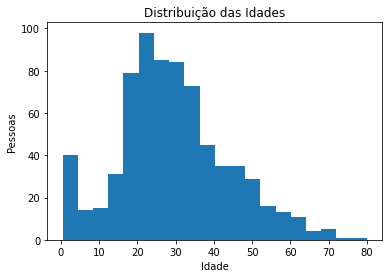

In [22]:
# fazendo histograma da idade
plt.hist(data['Idade'].dropna(), bins=20) # .dropna() remove os valores nulos da coluna
                                          # o atributo bins configra a quantidade de
                                          # colunas no histograma
plt.title('Distribuição das Idades')
plt.ylabel('Pessoas')
plt.xlabel('Idade')

plt.show()  # mostra somente o histograma

In [25]:
# mostrar a distribuilção das classes
data['Classe'].unique() # .unique() mostra os elementos diferentes em casa coluna

array([3, 1, 2], dtype=int64)

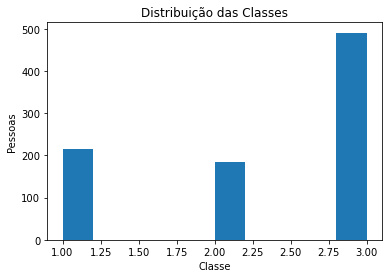

In [27]:
# fazendo histograma da idade
plt.hist(data['Classe']) 
plt.title('Distribuição das Classes')
plt.ylabel('Pessoas')
plt.xlabel('Classe')

plt.show()  # mostra somente o histograma

### Subplots - 1ª Forma

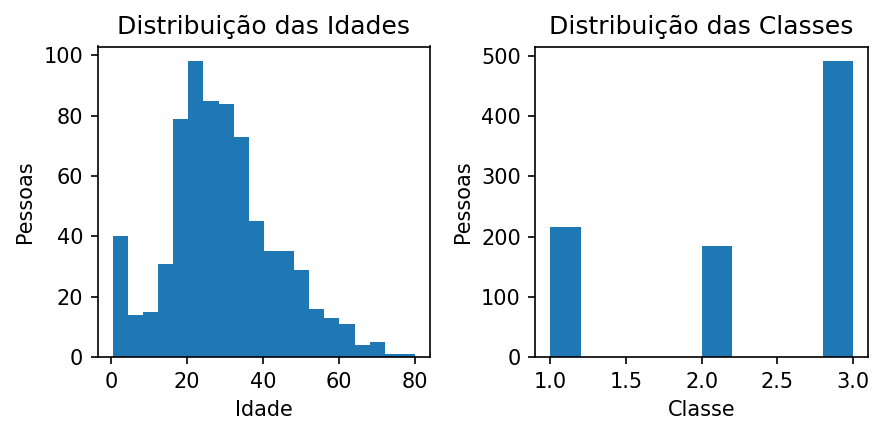

In [52]:
# plotar os dois histogramas no mesmo gráfico
plt.figure(figsize=(6,3), dpi=150) # Define o tamanho da figura
# subplot 1:
plt.subplot(1, 2, 1) # 1 linha, 2 coluna, plot 1
plt.hist(data['Idade'].dropna(), bins=20)
plt.title('Distribuição das Idades')
plt.ylabel('Pessoas')
plt.xlabel('Idade')

# subplot 2:
plt.subplot(1, 2, 2) # 1 linha, 2 coluna, plot 2
plt.hist(data['Classe']) 
plt.title('Distribuição das Classes')
plt.ylabel('Pessoas')
plt.xlabel('Classe')

plt.tight_layout() # Ajuda os gráficos não ficarem sobrepostos um ao outro
plt.show()

### Subplots - 2ª Forma

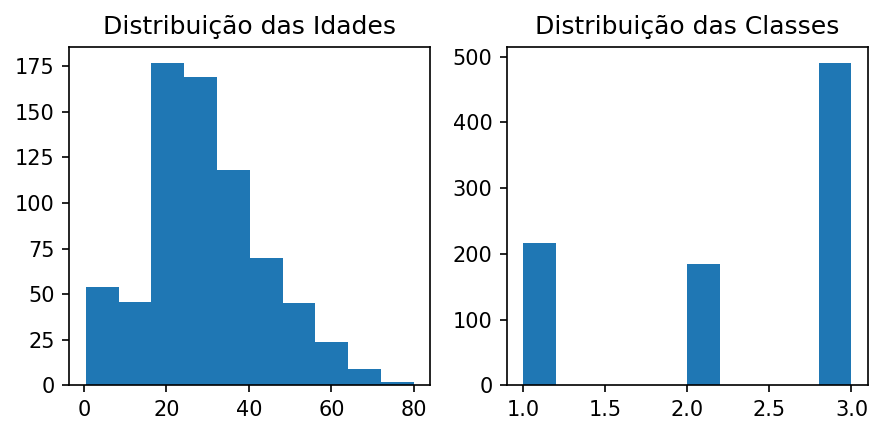

In [51]:
f, ax = plt.subplots(1,2, figsize=(6,3), dpi=150) # f: figure, ax: axis
                          # ax, nesse caso, será uma lista de dois elementos
                          # contendo objetos do tipo matplotlib
                          # dpi: aumenta a qualida da imagem

# Primeiro plot
ax[0].hist(data['Idade'].dropna()) 
ax[0].set_title('Distribuição das Idades')


# Segundo plot
ax[1].hist(data['Classe'])
ax[1].set_title('Distribuição das Classes')

plt.tight_layout()
plt.show()

### Seaborn

In [53]:
# seaborn é uma biblioteca de visualização de dados baseada no matplotlib
# o foco dela é fazer com que se perca menos tempo para criar um gráfico
# apresentável, sendo assim, o cientista de dados perde menos tempo na apre-
# sentação dos dados e mais tempo na análise deles.

import seaborn as sns

In [56]:
data['Sobreviveu'].value_counts()

0    549
1    342
Name: Sobreviveu, dtype: int64

In [57]:
data['Sexo'].value_counts()

homem     577
mulher    314
Name: Sexo, dtype: int64

In [58]:
data['Classe'].value_counts()

3    491
1    216
2    184
Name: Classe, dtype: int64

### pie e countplot

C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


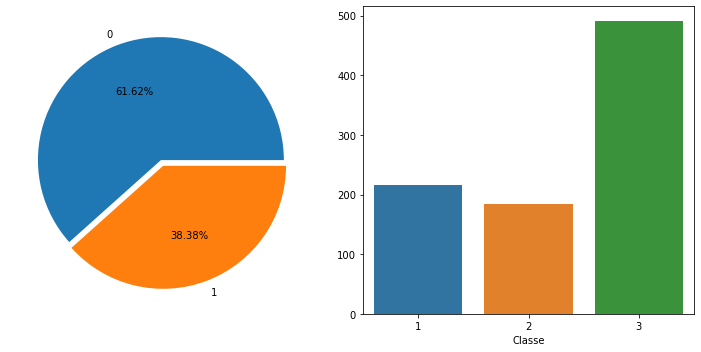

In [71]:
f, ax = plt.subplots(1,2, figsize=(10,5))

# Visualizando dados com o .pie
data['Sobreviveu'].value_counts().plot.pie(ax=ax[0], explode=[0, 0.05], 
                                          autopct='%0.2f%%')
    # explode=[0, 0.05]: é um argumento nomeado que dá o espaçamento/corte
    # entre as duas entidades do gráfico
    # autopct='%0.2f%%': Significa que queremos que o gráfico seja preenchido
    # com dados percentuais com duas casas decimais
ax[0].set_ylabel('')

# Visualizando gráficos com o Seaborn
sns.countplot('Classe', data=data, ax=ax[1])
    # .countplot(): Esse método irá retornar um gráfico de barras
    # 'Classe': é o nome da coluna que estamos querendo plotar, no caso,
    # a coluna 'Classe'
    # data=_: se refere aos nossos dados, no nosso caso, nosso dataframe data
    # ax=_: Será o axis que o seaborn irá alojar o gráfico criado
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

### countplot  e hue

C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


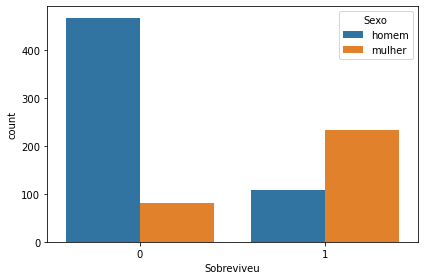

In [73]:
sns.countplot('Sobreviveu', hue='Sexo', data=data)

plt.tight_layout()
plt.show()

### boxplot

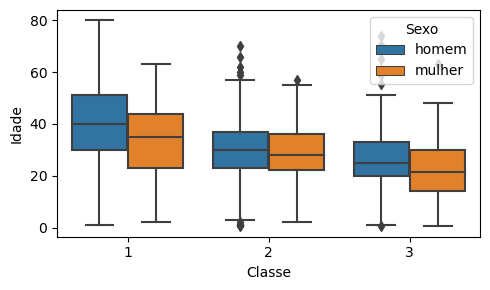

In [78]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='Classe', y='Idade', hue='Sexo', data=data)

plt.tight_layout()
plt.show()

### violinplot

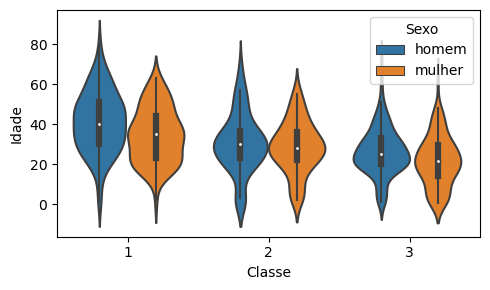

In [79]:
plt.figure(figsize=(5,3), dpi=100)
sns.violinplot(x='Classe', y='Idade', hue='Sexo', data=data)

plt.tight_layout()
plt.show()

### FacetGrid com hist

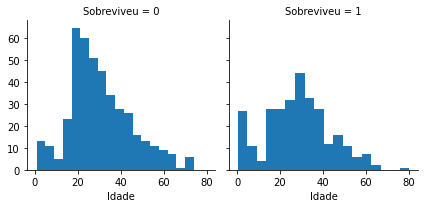

In [81]:
# FacetGrid: nos ajuda a criar vários gráficos diferentes no mesmo canvas

g = sns.FacetGrid(data, col='Sobreviveu')

# Cria, o histograma da Idade
g.map(plt.hist, 'Idade', bins=18)



plt.tight_layout()
plt.show()

### FacetGrid com barplot

C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


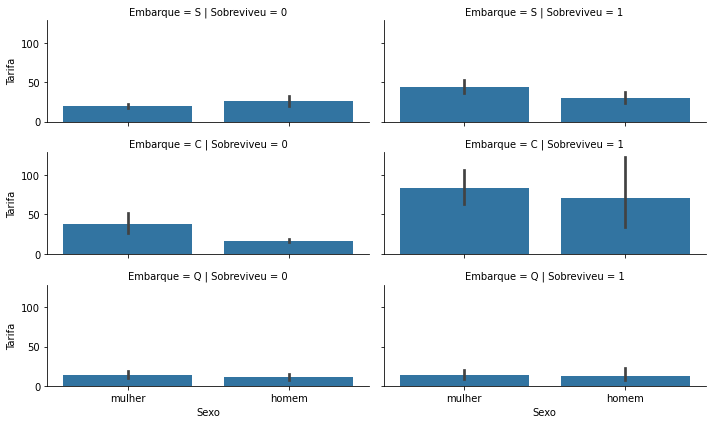

In [85]:
g = sns.FacetGrid(data, row='Embarque', col='Sobreviveu')

g.map(sns.barplot, 'Sexo', 'Tarifa')

# Outra forma de mudar o tamanho da figura
fig = plt.gcf()
fig.set_size_inches(10,6)

plt.tight_layout()
plt.show()

### FacetGrid com distplot

C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

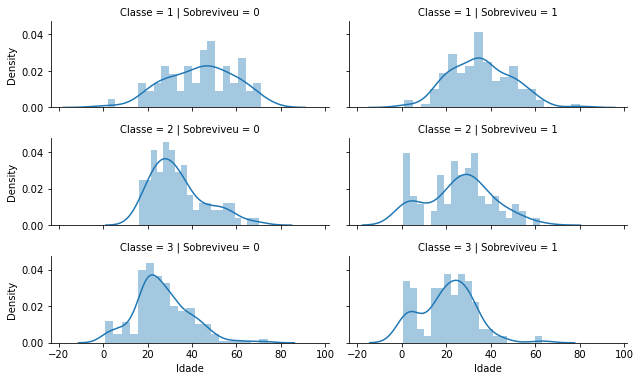

In [88]:
g = sns.FacetGrid(data, col='Sobreviveu',row='Classe', height=1.8, aspect=2.5)
                                            # height: Altura da distribuição 
                                            # aspect: Largura da distribuição
g.map(sns.distplot, 'Idade',bins=20)

plt.tight_layout()
plt.show()

### catplot do tipo "point"

C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


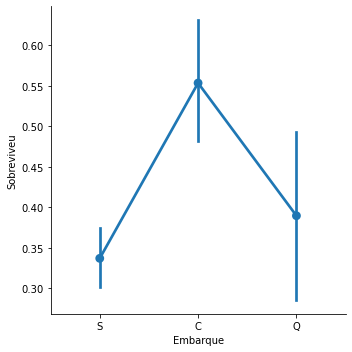

In [92]:
sns.catplot('Embarque', 'Sobreviveu', data=data, kind='point')
                                    # ci: é um atributo relacionado a, mostrar
                                    # ou não mostrar um intervalo de confiança
                                    # no nosso catplot()

### FacetGrid com pointplot

C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


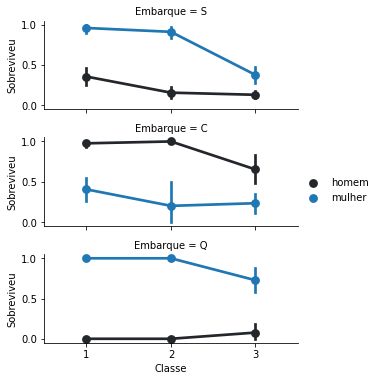

In [94]:
g = sns.FacetGrid(data, row='Embarque', height=1.8, aspect=2.5)
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo')
g.add_legend()

### heatmap

In [95]:
data.isnull().sum() # contagem de valores nulos

IdPassageiro        0
Sobreviveu          0
Classe              0
Nome                0
Sexo                0
Idade             177
IrmaosConjugue      0
PaisFilhos          0
Bilhete             0
Tarifa              0
Cabine            687
Embarque            2
dtype: int64

<AxesSubplot:>

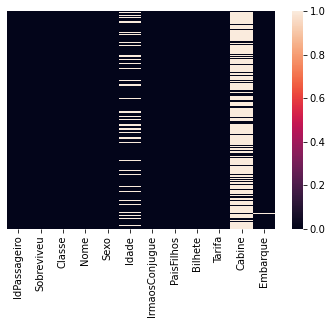

In [97]:
sns.heatmap(data.isnull(), yticklabels=False) # mapa de calor
                            # yticklabels: mostra labels do eixo y
                            # cbar: habilita ou desabilita a barra lateral
                            # de cores 

### relplot

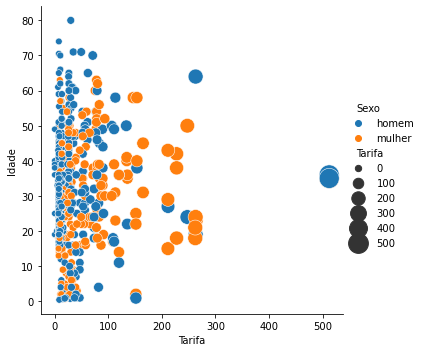

In [100]:
sns.relplot(x='Tarifa', y='Idade', hue='Sexo', data=data, size='Tarifa',
               sizes=(40, 400))

### scatterplot

<AxesSubplot:xlabel='Idade', ylabel='Tarifa'>

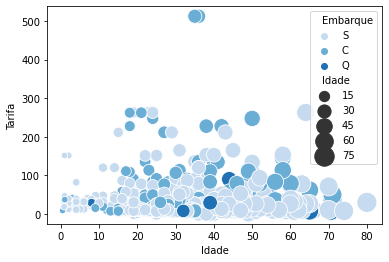

In [102]:
sns.scatterplot(x='Idade', y='Tarifa', hue='Embarque', data=data, size='Idade',
                   sizes=(40, 400), palette='Blues')

### pairplot

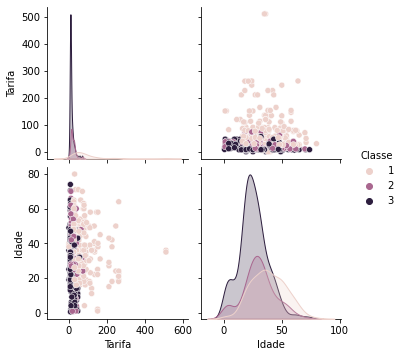

In [104]:
sns.pairplot(data[['Tarifa', 'Idade', 'Classe', 'Sexo', 'Embarque']], 
                 hue='Classe')

### jointplot tipo "kde"

C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


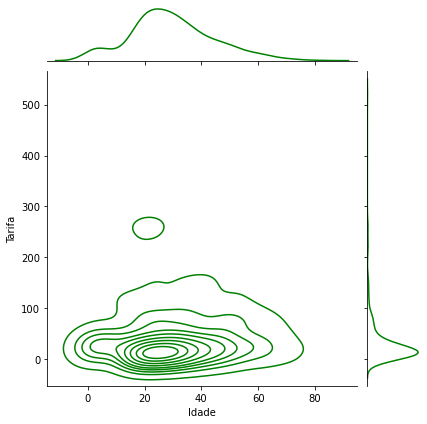

In [105]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='kde', color='g')

### jointplot tipo "reg"

C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


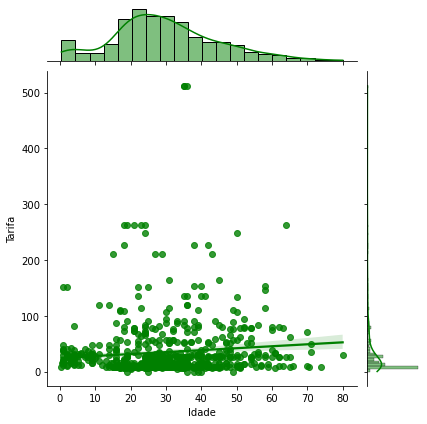

In [106]:
sns.jointplot('Idade', 'Tarifa', data=data, kind='reg', color='g')

### kdeplot

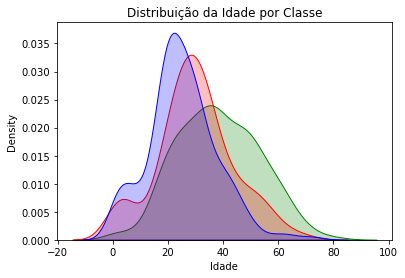

In [116]:
sns.kdeplot(data['Idade'].loc[data['Classe']==1], shade=True, 
            color='g',label='1ª Classe')

sns.kdeplot(data['Idade'].loc[data['Classe']==2], shade=True, 
            color='r',label='2ª Classe')

sns.kdeplot(data['Idade'].loc[data['Classe']==3], shade=True, 
            color='b',label='3ª Classe')

plt.title('Distribuição da Idade por Classe')
plt.show()

### catplot do tipo "count"

C:\Users\Leonardo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


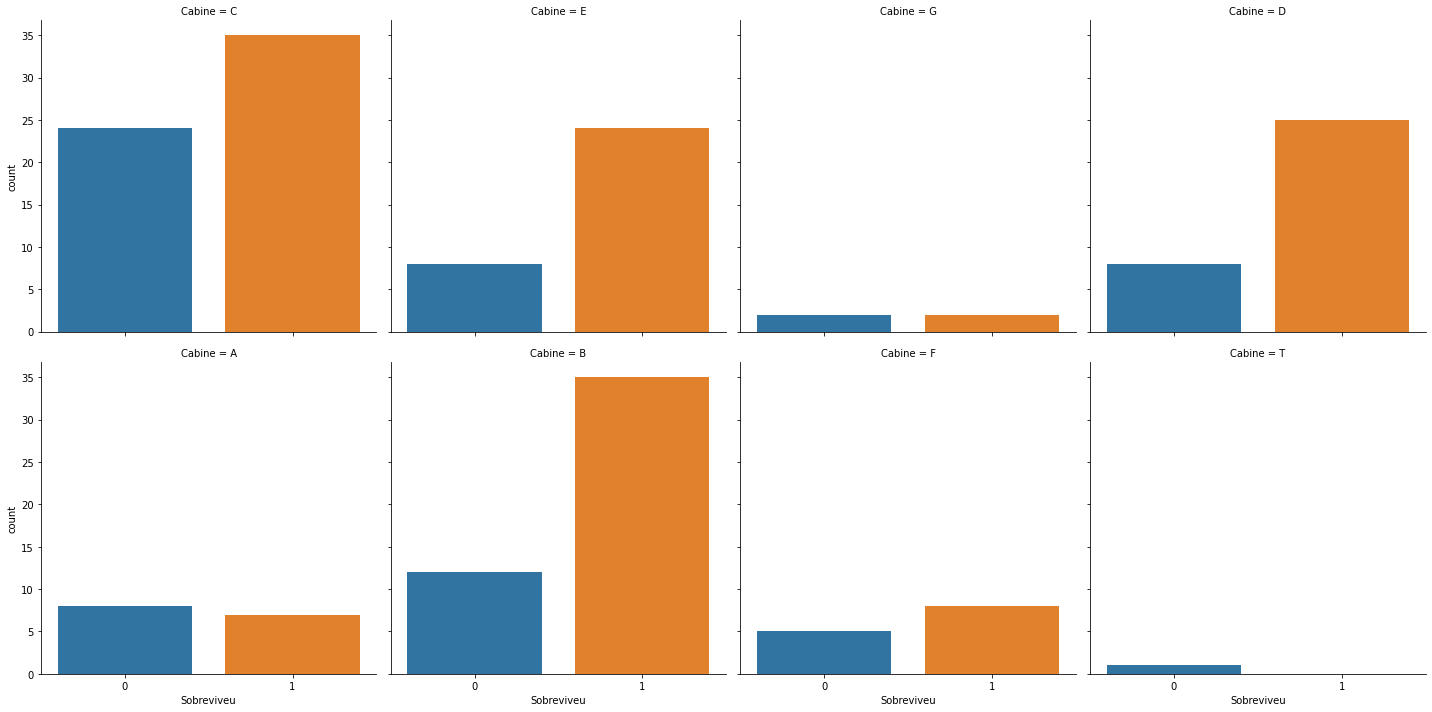

In [118]:
sns.catplot('Sobreviveu', 
            col='Cabine', 
            data=data[['Sobreviveu', 'Cabine']].dropna(), 
            kind='count',
            col_wrap=4 # "Embrulha" quatro colunas
           )

plt.show()

### heatmap corr()

<AxesSubplot:>

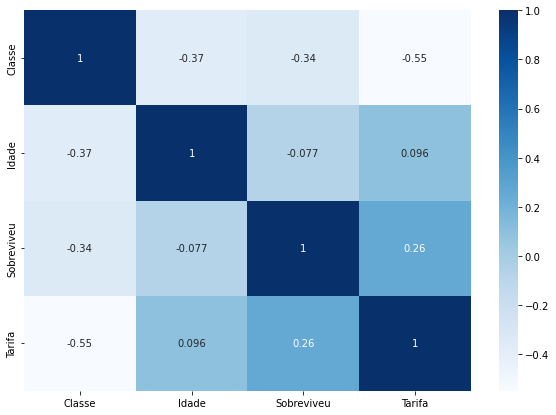

In [122]:
# Correlação
plt.figure(figsize=(10,7))
sns.heatmap(data[['Classe', 'Idade', 'Sobreviveu', 'Tarifa', 'Embarque']].corr(),
            cmap='Blues',
            annot=True
           )

### plot

In [123]:
x = np.random.normal(10, 1, 15) # criando 15 elementos com 
                                # media 10 e desvio padrão 1 

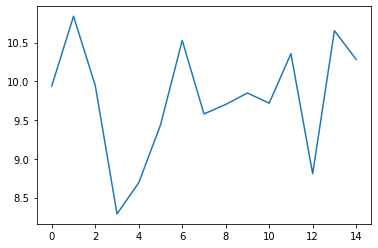

In [124]:
plt.plot(x)

In [126]:
x = np.linspace(0, 20, 1000) # criando 1000 numeros igualmente espaçados 
                             # em um intervalo entre 0 e 20

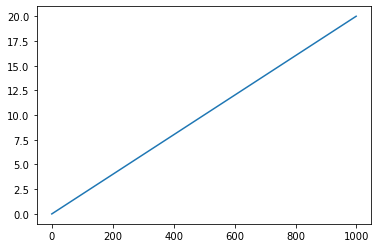

In [127]:
plt.plot(x)

### linspace

### normal

Fontes:
* https://matplotlib.org/gallery/index.html
* https://seaborn.pydata.org/examples/index.html
* https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#1.-Scatter-plot
* https://matplotlib.org/tutorials/colors/colormaps.html